In [1]:
import pandas as pd
import pickle
import numpy as np
import datetime
import collections

In [2]:
def get_dfs(files, file_type):
    
        if(file_type == "csv"):
            return (pd.read_csv(file) for file in files)


        elif(file_type == "excel"):
            return (pd.read_excel(file) for file in files)
            
            


In [3]:
# One hot encoding
def get_dummies(data, test_data, cols):
    
    data["train"] = 1
    test_data["train"] = 0
    
    merged_data = pd.concat([data, test_data], axis = 0).reset_index(drop=True)
    
    
    for col in cols:
        
        merged_data = pd.concat([pd.get_dummies(merged_data[col] , prefix=col, dummy_na=True) , merged_data],axis = 1)
        
    return merged_data
    

In [4]:
def split_month(x):
    return x.split('-')[1]

def split_year(x):
    return x.split('-')[2]

In [5]:
def is_reinspection(x):
    if (x.find('RE-INSPECTION') == -1): 
        return 0
    else:
        return 1

In [6]:
def convert_date(d):
    try:
        
        return datetime.datetime.strptime(d, '%d-%m-%Y')
    except Exception as e:
        converted_str = str(int(d.split("-")[0]) - 1)  + '-' + str(d.split("-")[1]) +  '-' + str(d.split("-")[2])
        
        return  datetime.datetime.strptime(converted_str, '%d-%m-%Y')

In [7]:
def save_model(filename):
    pickle.dump(model, open(filename, 'wb'))

In [8]:
data, test_data, sample_sub, final_type = get_dfs(["Food_QUalityA_ParticipantsData/Data_Train.xlsx",\
                                      "Food_QUalityA_ParticipantsData/Data_Test.xlsx",\
                                      "Food_QUalityA_ParticipantsData/Sample_Submission.xlsx", "type_df_org.xlsx"], file_type = "excel")

In [9]:
data.head()

,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results
0,31103489027986,26-04-2010,4744,8123,7715,RESTAURANT,15522,id-11235901,id_1890134,81876.0,CANVASS,33.0,High,locid16406,4
1,10088999935915,21-06-2009,2973,12268,11664,GROCERY STORE,3057,id-11235901,id_1890134,81862.0,COMPLAINT,33.0,High,locid878,4
2,40148966010272,01-05-2013,18223,1112,969,RESTAURANT,14988,id-11235901,id_1890134,81883.0,CANVASS,NaN,High,locid3368,6
3,37157708563676,28-09-2015,20825,20007,19115,RESTAURANT,3661,id-11235901,id_1890134,81859.0,CANVASS RE-INSPECTION,31.0,Medium,locid11839,4
4,47478049564374,09-12-2015,2136,16867,10409,RESTAURANT,7876,id-11235901,id_1890134,81886.0,COMPLAINT,30.0,High,locid12264,4


In [10]:
data['month'] =  data['Date'].apply(split_month)
test_data['month'] =  test_data['Date'].apply(split_month)

data['year'] =  data['Date'].apply(split_year)
test_data['year'] =  test_data['Date'].apply(split_year)


In [11]:
final_map_index = final_type.set_index(0).T.to_dict('list')

In [12]:
final_map_index


{'RESTAURANT': [0, 'RESTAURANT', nan],
 'GROCERY STORE': [1, 'GROCERY', nan],
 "CHILDREN'S SERVICES FACILITY": [2, "CHILDREN'S SERVICES FACILITY", nan],
 'GAS STATION': [3, 'GAS', nan],
 'SCHOOL': [4, 'SCHOOL', nan],
 'PALETERIA': [5, 'PALETERIA', nan],
 'DAYCARE ABOVE AND UNDER 2 YEARS': [6, 'DAYCARE', nan],
 'MEAT PACKING': [7, 'MEAT PACKING', nan],
 'LONG TERM CARE': [8, 'LONG TERM CARE ', nan],
 nan: [9, nan, nan],
 'LIQUOR': [10, 'LIQUOR', nan],
 'DAYCARE (2 - 6 YEARS)': [11, 'DAYCARE', nan],
 'COMMISSARY FOR SOFT SERVE ICE CREAM TRUCKS': [12, 'COMMISSARY', nan],
 'CONVENIENCE STORE': [13, 'CONVENIENCE', nan],
 'DAYCARE (UNDER 2 YEARS)': [14, 'DAYCARE', nan],
 'SHARED KITCHEN USER (LONG TERM)': [15, 'SHARED KITCHEN', nan],
 'GOLDEN DINER': [16, 'RESTAURANT', nan],
 'BAKERY': [17, 'BAKERY', nan],
 'WRIGLEY ROOFTOP': [18, 'ROOFTOP', nan],
 'DAYCARE COMBO 1586': [19, 'DAYCARE', nan],
 'DAYCARE NIGHT': [20, 'DAYCARE', nan],
 'MOBILE FOOD PREPARER': [21, 'MOBILE FOOD', nan],
 'POPCORN 

In [13]:
# Fill Empty Data Types - Train
data_type_null = data[data['Type'].isnull()]
for ind in data_type_null.index:
    
    FacilityID = data_type_null['FacilityID'][ind]
    data_license_df = data[data['FacilityID'] == FacilityID]
    
    if (len(data_license_df[data_license_df ['Type'].notnull()]  ) > 0 ):
                 
        data['Type'][ind] = data_license_df[data_license_df ['Type'].notnull()]['Type'].values[0]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [14]:
# Fill Data Types - Test

test_data_type_null = test_data[test_data['Type'].isnull()]

for ind in test_data_type_null.index:
    
    FacilityID = test_data_type_null['FacilityID'][ind]
    test_data_license_df = test_data[test_data['FacilityID'] == FacilityID]
    
    if (len(test_data_license_df[test_data_license_df ['Type'].notnull()]  ) > 0 ):
                 
        test_data['Type'][ind] = test_data_license_df[test_data_license_df ['Type'].notnull()]['Type'].values[0]
    
    


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [15]:
def map_final_type(x):
    
    return [ final_map_index[x][1], final_map_index[x][2] ]

In [16]:
type_concat = pd.concat([data, test_data], axis = 0).reset_index(drop=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [17]:
merged_data = get_dummies(data, test_data, ['City','State','Reason','SectionViolations', \
                                            'LocationID','RiskLevel','month','year'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [18]:
merged_data['unique_type_map'] = merged_data['Type'].apply(map_final_type)

In [19]:
# Calculating difference between previous inspection and current inspection
merged_data['Date_m'] = merged_data['Date'].apply(convert_date)
merged_data['prior_date'] = 0
sorted_date = merged_data.sort_values(by = ['Date_m'])
group_by = sorted_date.groupby('FacilityID')
# data[data['FacilityID'] == 1].sort_values(by = 'Date_m')

previous_index = 0
for name, group in group_by:
    for row_index, ind in enumerate(group.index):       

        if(row_index != 0):
            merged_data['prior_date'][ind] = (group['Date_m'][ind] - group['Date_m'][previous_index]).days
            previous_index = ind

        else:
            previous_index = ind

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [20]:
# To check whether this is the first inspection
merged_data['Date_m'] = merged_data['Date'].apply(convert_date)
merged_data['first_date'] = 0
sorted_date = merged_data.sort_values(by = ['Date_m'])
group_by = sorted_date.groupby('FacilityID')
# data[data['FacilityID'] == 1].sort_values(by = 'Date_m')

previous_index = 0
for name, group in group_by:
    for row_index, ind in enumerate(group.index):       

        
        if(row_index == 0):
            merged_data['first_date'][ind] = 1

        else:
            merged_data['first_date'][ind] = 0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [21]:
# Check whether it is a last inspection and fill the empty types grouped by Facility ID
merged_data['Date_m'] = merged_data['Date'].apply(convert_date)
merged_data['is_last_date'] = 0
sorted_date = merged_data.sort_values(by = ['Date_m'])
group_by = sorted_date.groupby('FacilityID')
# data[data['FacilityID'] == 1].sort_values(by = 'Date_m')

previous_index = 0
for name, group in group_by:
    
    typeVal = np.nan
    for row_index, ind in enumerate(group.index):     

        
        if type(merged_data['Type'][ind]) == float and np.isnan(merged_data['Type'][ind]):            
            merged_data['Type'][ind] = typeVal
        else:
            typeVal = merged_data['Type'][ind]
            
        
        if(row_index == len(group.index) - 1):
            merged_data['is_last_date'][ind] = 1

        else:
            merged_data['is_last_date'][ind] = 0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [22]:
# Checking last inspection grouped by License No
merged_data['Date_m'] = merged_data['Date'].apply(convert_date)
merged_data['is_last_date_license'] = 0
sorted_date = merged_data.sort_values(by = ['Date_m'])
group_by = sorted_date.groupby('LicenseNo')
# data[data['FacilityID'] == 1].sort_values(by = 'Date_m')

previous_index = 0
for name, group in group_by:
    for row_index, ind in enumerate(group.index):     
       
        if(row_index == (len(group.index) - 1)):
            merged_data['is_last_date_license'][ind] = 1

        else:
            merged_data['is_last_date_license'][ind] = 0


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [23]:
# Checking last inspection grouped by Geo Location
merged_data['Date_m'] = merged_data['Date'].apply(convert_date)
merged_data['is_last_date_geoloc'] = 0
sorted_date = merged_data.sort_values(by = ['Date_m'])
group_by = sorted_date.groupby('Geo_Loc')
# data[data['FacilityID'] == 1].sort_values(by = 'Date_m')

previous_index = 0
for name, group in group_by:
    for row_index, ind in enumerate(group.index):     
        
        if(row_index == (len(group.index) - 1)):
            merged_data['is_last_date_geoloc'][ind] = 1

        else:
            merged_data['is_last_date_geoloc'][ind] = 0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [24]:
# Calculating unique Types
merged_data['unique_type_map'] = merged_data['Type'].apply(map_final_type)

In [25]:
type_dummies = merged_data['unique_type_map'].apply(collections.Counter)
type_dummies_p = pd.DataFrame.from_records(type_dummies)
type_dummies_final = type_dummies_p.drop(type_dummies_p.columns[1] , axis =1 )
type_dummies_final = type_dummies_final.fillna(0)
final_processed_df = pd.concat([merged_data, type_dummies_final], axis = 1)
# Drop the original column after taking one hot encoding
final_processed_df = final_processed_df.drop('unique_type_map', axis = 1)

In [26]:
# Normalising prior date
final_processed_df['prior_date'] = final_processed_df['prior_date']/366

In [27]:
# Taking Bins for prior_date
final_processed_df['prior_date'] = pd.cut(final_processed_df['prior_date'], [ -0.1, 0.0001, 0.001, 0.09,  0.2, 0.3 ,0.4,0.5,0.6,0.7,0.8,0.9,1.1], include_lowest=False,labels=[0, 1, 2,3,4,5,6,7,8,9,10,11])


In [28]:
# One hot vector for the prior_date
final_processed_df = pd.concat([pd.get_dummies(final_processed_df['prior_date'] , \
                                               prefix='prior_date', dummy_na=True) , final_processed_df],axis = 1)

In [29]:
# Splitting train and test
test_df =  final_processed_df[final_processed_df['train'] == 0]
train_df = final_processed_df[final_processed_df['train'] == 1]


In [30]:
train_X = train_df.drop(['ID', 'Date', 'LicenseNo', 'FacilityID', 'FacilityName', 'Type',
       'Street', 'City', 'State', 'LocationID', 'Reason', 'SectionViolations',
       'RiskLevel', 'Geo_Loc', 'Inspection_Results', 'train','month','year','Date_m', 'prior_date'], axis = 1)
# Date_m, prior_date

train_y = train_df['Inspection_Results']

from keras.utils import to_categorical
y_binary = to_categorical(train_y)

len(train_X.columns)

Using TensorFlow backend.


389

In [31]:
from numpy.random import seed
seed(6)

import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

opt = SGD(lr=0.01, momentum=0.9)

model = Sequential()
model.add(Dense(100, input_dim=389, activation='tanh'))

# model.add(Dense(8, activation='tanh'))
# model.add(Dense(20, activation='tanh'))
# model.add(Dense(8, activation='relu'))
model.add(Dense(7, activation='softmax'))


model.compile(loss = "categorical_crossentropy" , optimizer='adam',metrics=['accuracy'] )
history = model.fit(train_X, y_binary, epochs=10, batch_size=10)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Epoch 1/10
147443/147443 [==============================] - 21s 141us/step - loss: 0.3447 - accuracy: 0.8727
Epoch 2/10
147443/147443 [==============================] - 20s 138us/step - loss: 0.2975 - accuracy: 0.8844
Epoch 3/10
147443/147443 [==============================] - 20s 134us/step - loss: 0.2785 - accuracy: 0.8904s - loss: 0.2783 
Epoch 4/10
147443/147443 [==============================] - 19s 127us/step - loss: 0.2674 - accuracy: 0.8928
Epoch 5/10
147443/147443 [==============================] - 19s 131us/step - loss: 0.2594 - accuracy: 0.8965s - loss:
Epoch 6/10
147443/147443 [==============================] - 18s 125us/step - loss: 0.2533 - accuracy: 0.8984
Epoch 7/10
147443/147443 [==============================] - 19s 131us/step - loss: 0.2480 - accuracy: 0.9000
Epoch 8/10
147443/147443 [==============================] - 19s 130us/step - loss: 0.2433 - accuracy: 0.9026
Epoch 9/10
147443/14

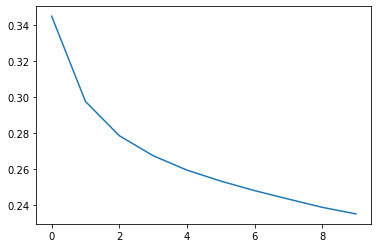

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [35]:
test_X = test_df.drop(['ID', 'Date', 'LicenseNo', 'FacilityID', 'FacilityName', 'Type',
       'Street', 'City', 'State', 'LocationID', 'Reason', 'SectionViolations',
       'RiskLevel', 'Geo_Loc', 'Inspection_Results', 'train','month','year','Date_m', 'prior_date'], axis = 1)


prediction = model.predict(test_X)

sub_excel = pd.DataFrame(prediction, columns= ['FACILITY CHANGED','FAIL','FURTHER INSPECTION REQUIRED',\
                                               'INSPECTION OVERRULED','PASS','PASS(CONDITIONAL)','SHUT-DOWN'])


sub_excel.to_excel("f14.xlsx", index=False)

save_model("best_final.sav")

##### I tried - Algorithms like Random Forest Classifier, SVC Classifier, Isolation forest to remove outliers, SMOTE to balance the dataset, ExtraTreesClassifier and several other preprocessing steps
I used Early stopping to avoid overfitting
